<b>ID</b>: This is a unique identifier of the accident record.

<b>Source</b>: Indicates source of the accident report (i.e. the API which reported the accident.).

<b>TMC</b>: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

<b>Severity</b>: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

<b>Start_Time</b>: Shows start time of the accident in local time zone.

<b>End_Time</b>: Shows end time of the accident in local time zone.

<b>Start_Lat</b>: Shows latitude in GPS coordinate of the start point.

<b>Start_Lng</b>: Shows longitude in GPS coordinate of the start point.

<b>End_Lat</b>: Shows latitude in GPS coordinate of the end point.

<b>End_Lng</b>: Shows longitude in GPS coordinate of the end point.

<b>Distance(mi)</b>: The length of the road extent affected by the accident.

<b>Description</b>: Shows natural language description of the accident.

Address Attributes (9):

</b>Number</b>: Shows the street number in address field.

</b>Street</b>: Shows the street name in address field.

<b>Side</b>: Shows the relative side of the street (Right/Left) in address field.

<b>City</b>: Shows the city in address field.

<b>County</b>: Shows the county in address field.

<b>State</b>: Shows the state in address field.

<b>Zipcode</b>: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Weather Attributes (11):

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

POI Attributes (13):

Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

Stop: A POI annotation which indicates presence of stop sign in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Period-of-Day (4):

<b>Sunrise_Sunset</b>: Shows the period of day (i.e. day or night) based on sunrise/sunset.

<b>Civil_Twilight</b>: Shows the period of day (i.e. day or night) based on civil twilight.

<b>Nautical_Twilight</b>: Shows the period of day (i.e. day or night) based on nautical twilight.

<b>Astronomical_Twilight</b>: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
from scipy.stats import boxcox


In [6]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))


The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [7]:
df.Source.unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

['MapQuest' 'MapQuest-Bing' 'Bing']


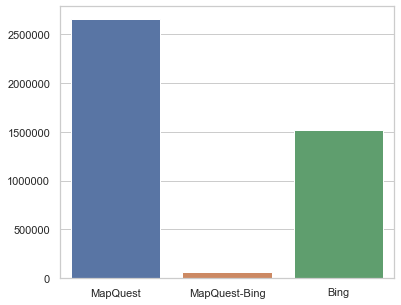

In [37]:
source = df.Source.unique()
print(source)
countBySource = []
for i in df.Source.unique():
    countBySource.append(df[df['Source']== i].count()['Source'])
fig,ax = plt.subplots(figsize=(6,5))
sns.barplot(x=source, y=countBySource)

In [8]:
df.dtypes


ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [9]:
df.isnull().sum()


ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

this will give us the count of accidents per state

In [10]:
state_wise_counts = df.groupby('State')['ID'].count().reset_index()


In [11]:
state_wise_counts.shape


(49, 2)

In [12]:
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)


In [13]:
state_wise_counts.head()


,State,ID
3,CA,972585
41,TX,376445
8,FL,370131
38,SC,212712
25,NC,193457


In [14]:
import seaborn as sns

sns.set(style="whitegrid")


In [15]:
states = df.State.unique()

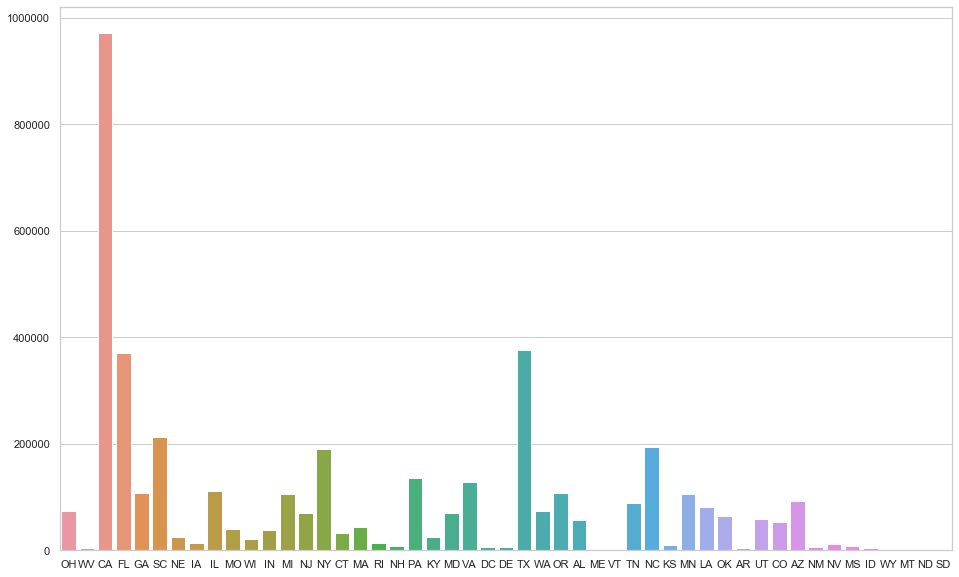

In [16]:
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,count_by_state)

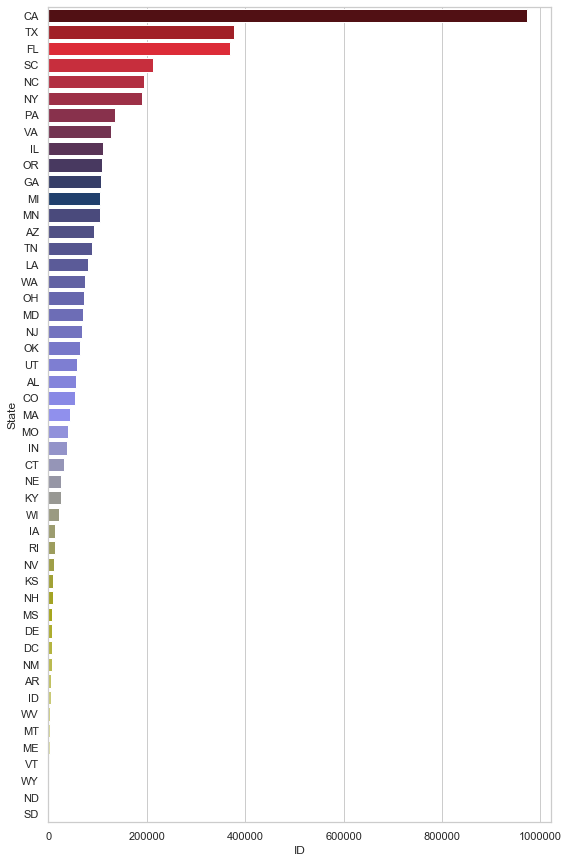

In [17]:
f, ax = plt.subplots(figsize=(9, 15))
sns.barplot(y="State", x="ID", data=state_wise_counts, palette="gist_stern")


 analyze what were the most frequent road features during accidents

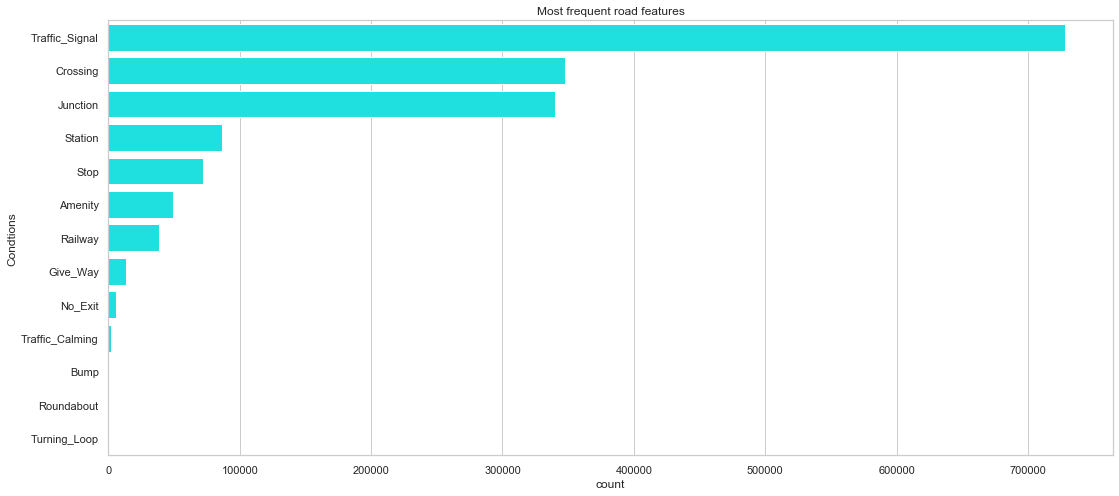

In [18]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, color='cyan')
plt.xlabel("count")
plt.ylabel("Condtions")
plt.show()

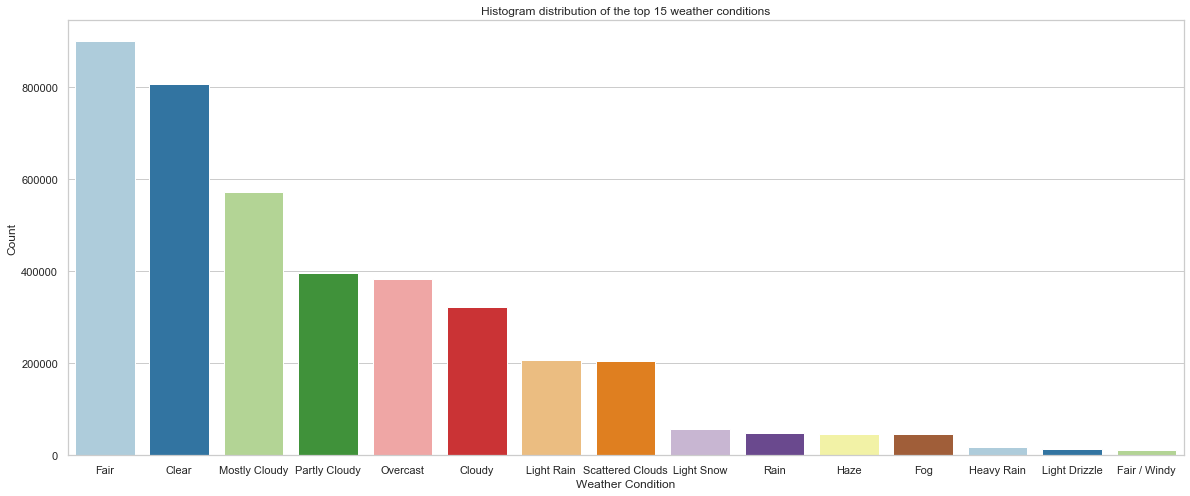

In [19]:
counts = df["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))

plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values, palette="Paired")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()


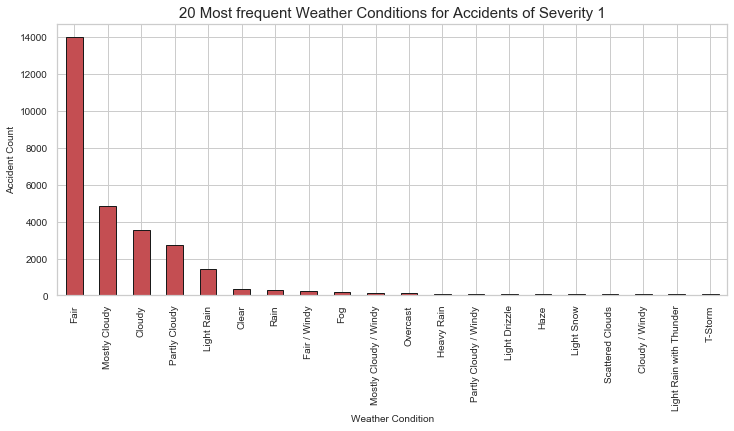

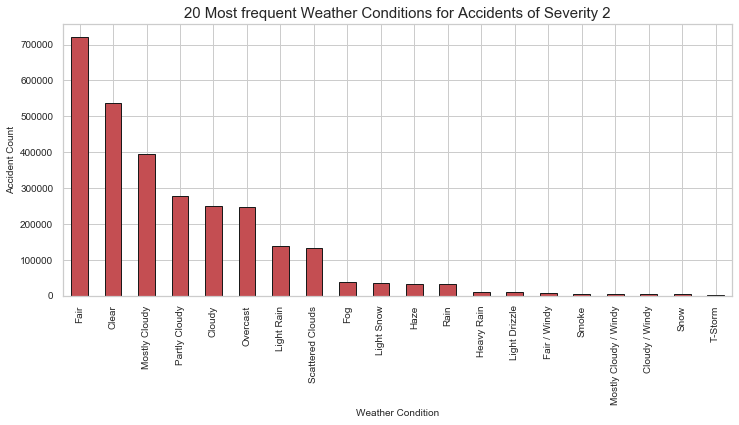

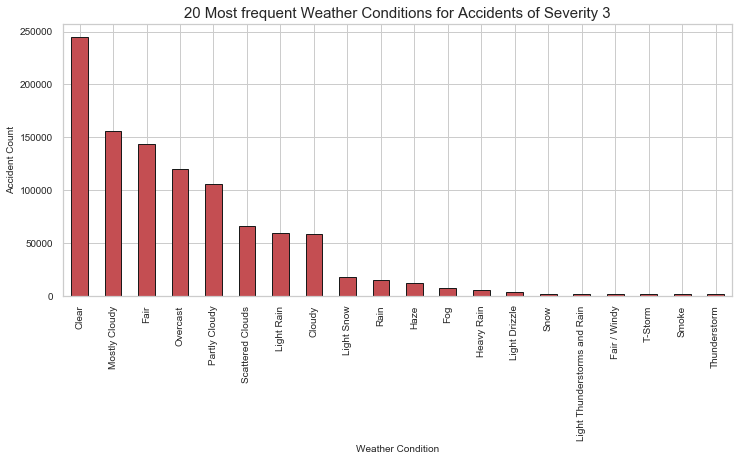

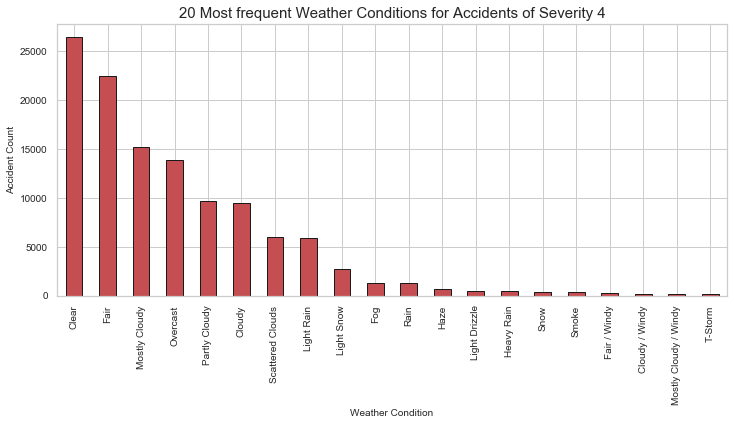

In [20]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=10)
    plt.ylabel('Accident Count',fontsize=10)
    plt.title('20 Most frequent Weather Conditions for Accidents of Severity ' + str(s),fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

In [25]:
df_time = df.loc[:,['ID', 'Start_Time', 'End_Time']]  # converting start end time to date time format
df_time['Start_Time'] = pd.to_datetime(df_time['Start_Time'])
df_time['End_Time'] = pd.to_datetime(df_time['End_Time'])
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 3 columns):
ID            object
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 96.9+ MB


[2016 2017 2020 2019 2018]


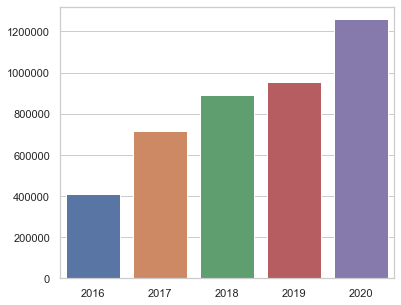

In [28]:
df_time['Year'] = df_time['Start_Time'].dt.year
year = df_time.Year.unique()
print(year)
countByYear= []
for i in df_time.Year.unique():
    countByYear.append(df_time[df_time['Year']== i].count()['Year'])
fig,ax = plt.subplots(figsize=(6,5))
sns.barplot(x=year, y=countByYear)

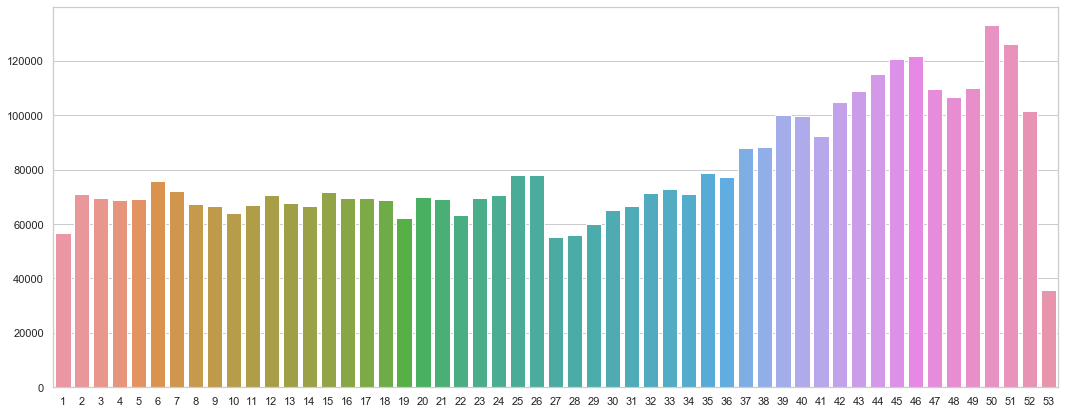

In [30]:
df_time['Week'] = df_time['Start_Time'].dt.week
week = df_time.Week.unique()
countByWeek= []
for i in df_time.Week.unique():
    countByWeek.append(df_time[df_time['Week']== i].count()['Week'])
fig,ax = plt.subplots(figsize=(18,7))
sns.barplot(x=week, y=countByWeek)

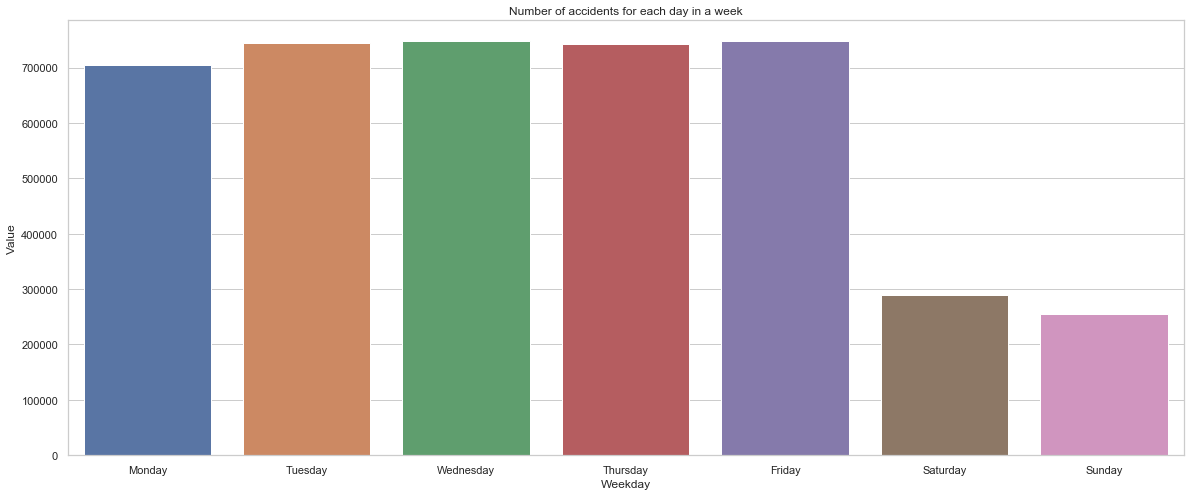

In [31]:
counts = pd.to_datetime(df['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each day in a week")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()


Text(0, 0.5, 'Severity')

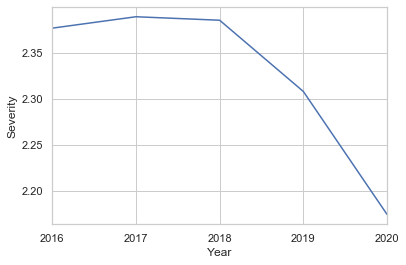

In [32]:
df_time['Year'] = df_time['Start_Time'].dt.year
df_time['Severity']=df['Severity']
severityByYear = df_time.groupby('Year')['Severity'].mean().plot(kind = 'line')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel("Severity")

In [33]:
df_time['Start_hour'] = df_time['Start_Time'].dt.hour
hours = df_time.groupby(['Start_hour']).count()

hours

,ID,Start_Time,End_Time,Year,Week,Severity
Start_hour,,,,,,
0,59775,59775,59775,59775,59775,59775
1,55599,55599,55599,55599,55599,55599
2,51363,51363,51363,51363,51363,51363
3,44247,44247,44247,44247,44247,44247
4,89819,89819,89819,89819,89819,89819
5,122520,122520,122520,122520,122520,122520
6,228882,228882,228882,228882,228882,228882
7,349950,349950,349950,349950,349950,349950
8,358432,358432,358432,358432,358432,358432


Text(0.5, 1.0, 'Time when accident usually oocur in the US')

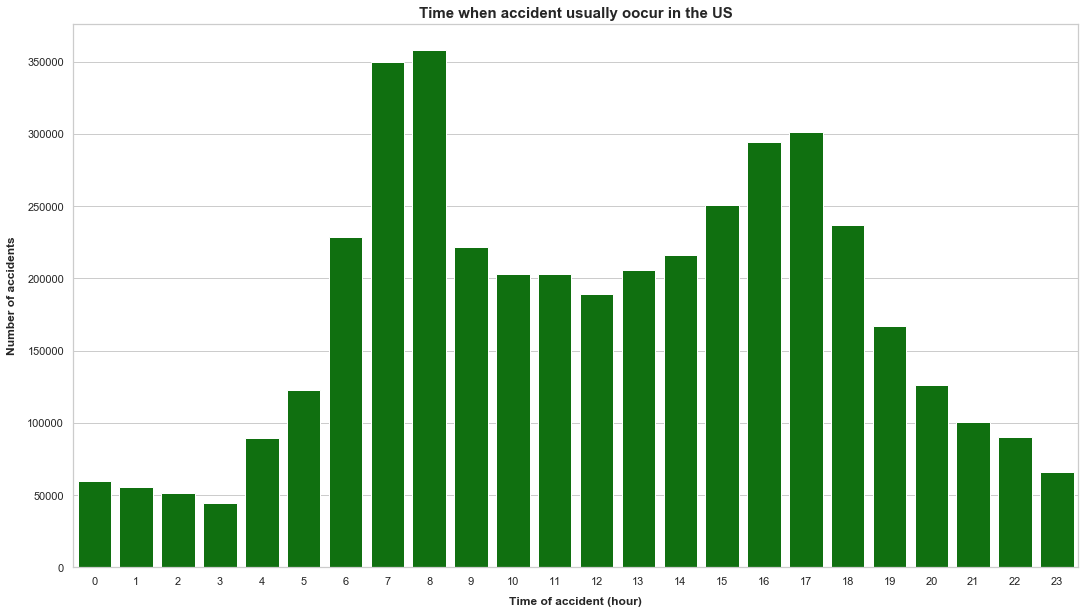

In [34]:
f, ax = plt.subplots(figsize = (18, 10))
sns.barplot(x = hours.index, y = 'Start_Time', data = hours, color='green')
plt.xlabel('Time of accident (hour)', labelpad = 10, fontsize=12, weight='bold')
plt.ylabel('Number of accidents', labelpad = 10, fontsize=12, weight='bold')
plt.title('Time when accident usually oocur in the US', fontsize = 15, weight = 'bold')


As We Can See Most Accident Occurs in the Morning Between 6am to 10 Am. As people leave to their Work in hurry.

Next Highest Percentage is between 3pm to 6pm

Text(0.5, 1.0, 'Severity of accidents')

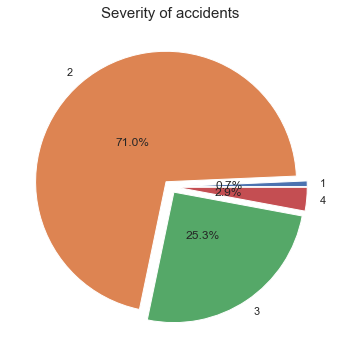

In [38]:
severityGrouping = df.groupby('Severity').size()
#Using matplotlib
pie, ax = plt.subplots(figsize=[8,6])
labels = severityGrouping.keys()
plt.pie(x=severityGrouping, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.4)
plt.title("Severity of accidents", fontsize=15)

In [39]:
import plotly.graph_objects as go
import matplotlib.ticker as ticke
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df_st_ct = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_st_ct.index,
    z = df_st_ct.values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'darkmint',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


Correlation matrix to analyze the replationship between attributes

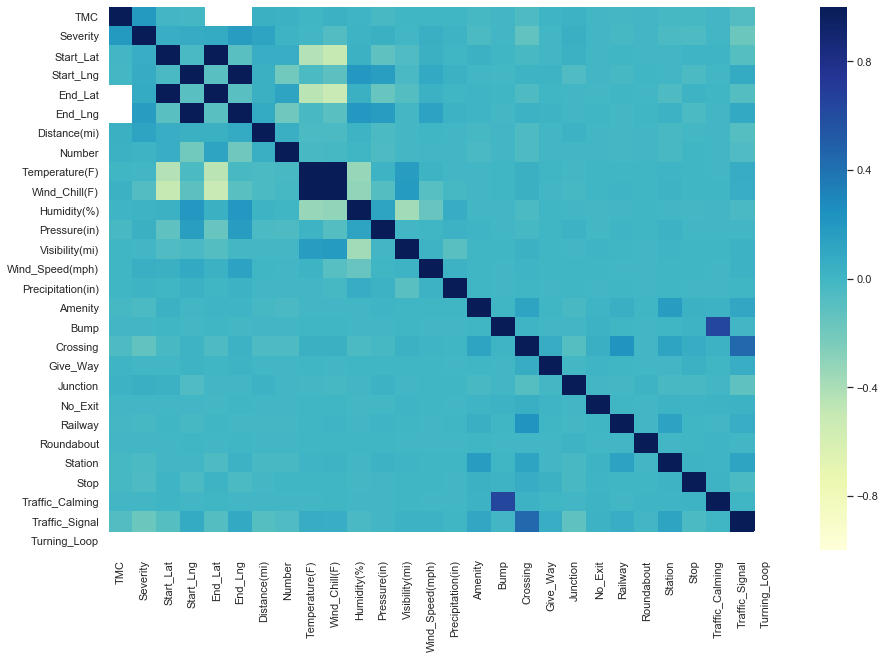

In [40]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="YlGnBu")
plt.gca().patch.set(hatch="df")
plt.show()